In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/titanic_dataset .csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


<Figure size 640x480 with 0 Axes>

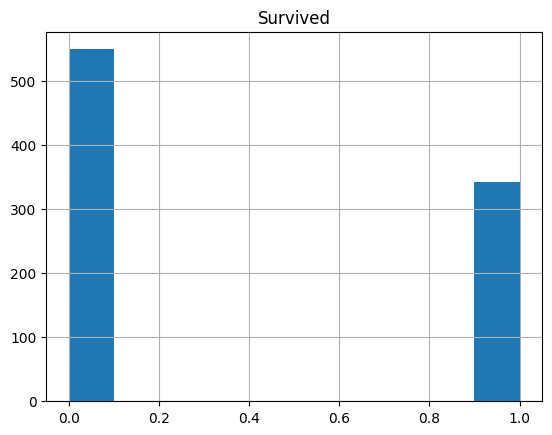

<Figure size 640x480 with 0 Axes>

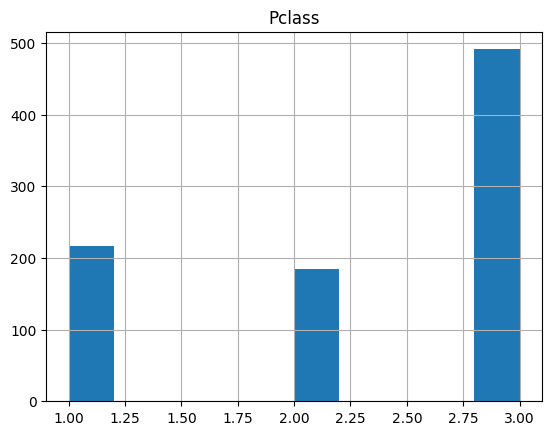

<Figure size 640x480 with 0 Axes>

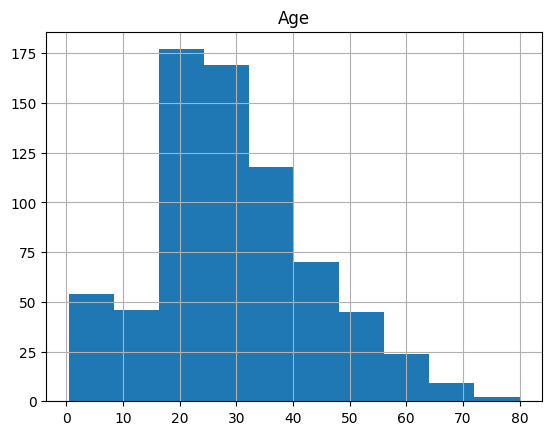

<Figure size 640x480 with 0 Axes>

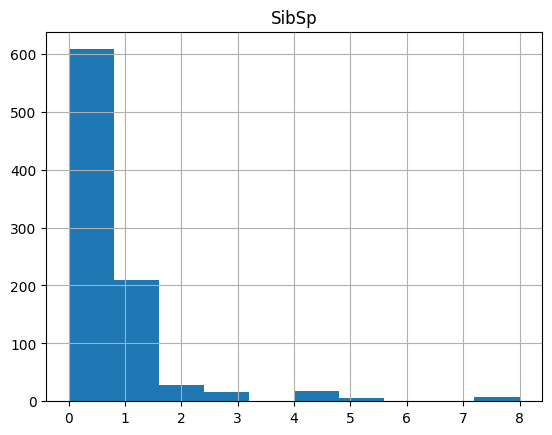

<Figure size 640x480 with 0 Axes>

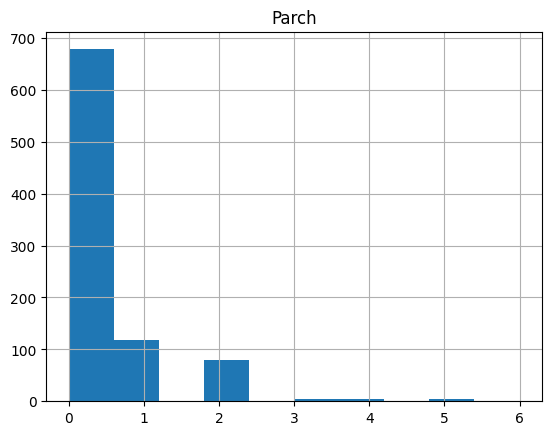

<Figure size 640x480 with 0 Axes>

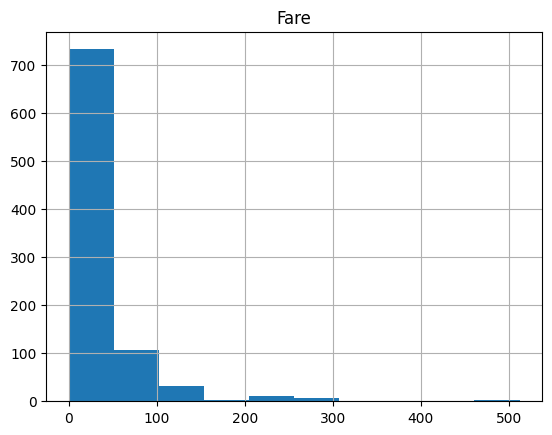

In [7]:
for col in df.columns:
  if df[col].dtype != 'object':
    plt.figure()
    df.hist([col])
    plt.title(col)

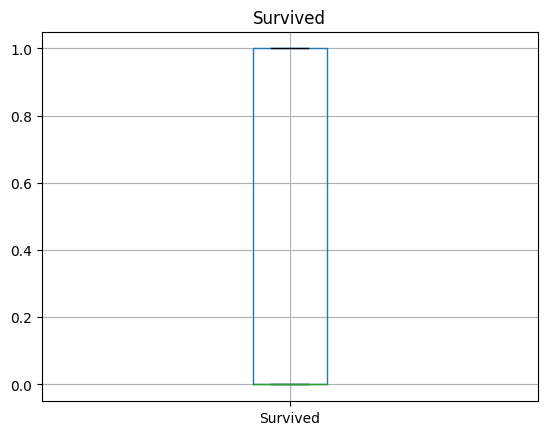

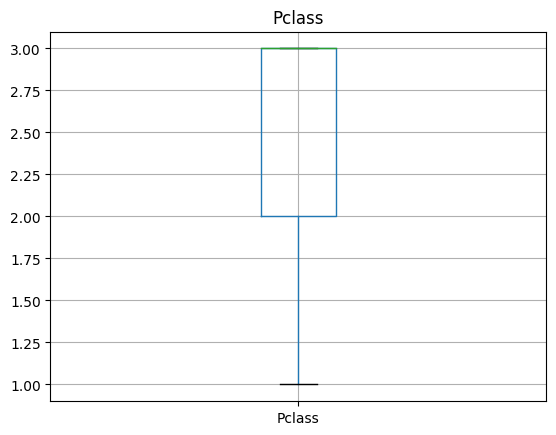

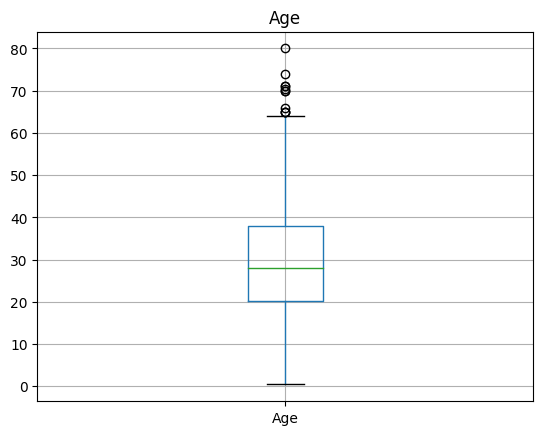

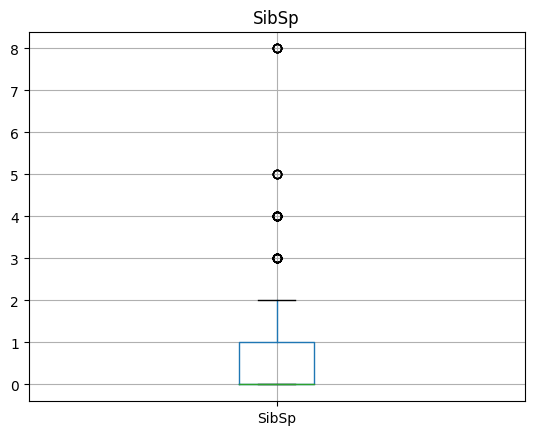

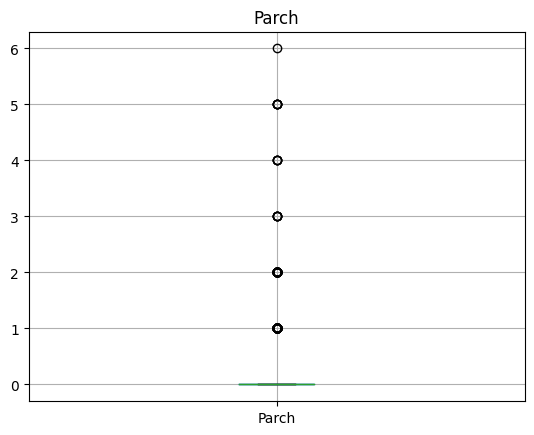

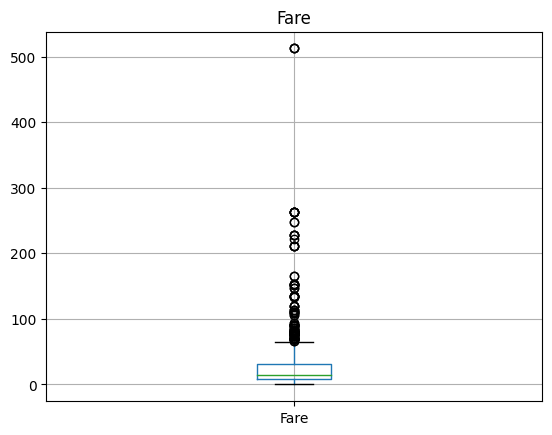

In [8]:
for col in df.columns:
  if df[col].dtype != 'object':
    plt.figure()
    df.boxplot([col])
    plt.title(col)

In [9]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [10]:
for col in df.columns:
  if df[col].dtype !='object':
    q1=df[col].quantile(0.25)
    q2=df[col].quantile(0.75)

   # find iqr
    iqr=q2-q1

   ##upper bound and lower
    upper=q2+1.5*iqr
    lower=q1-1.5*iqr
    df[col]=np.where(df[col]>upper,upper,df[col])
    df[col]=np.where(df[col]<lower,lower,df[col])


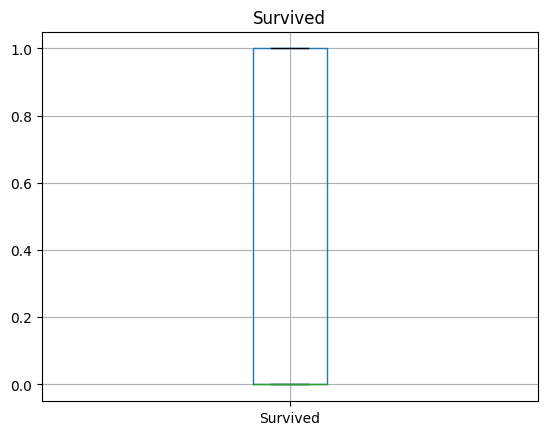

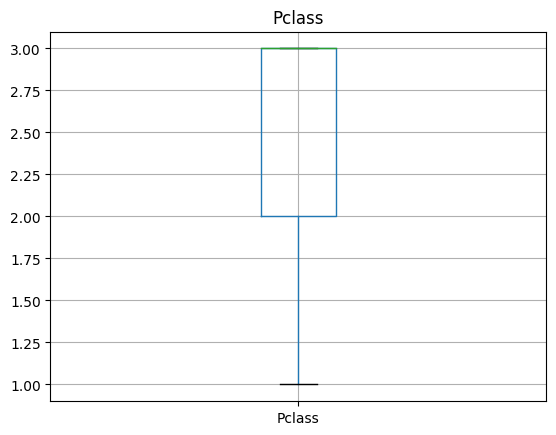

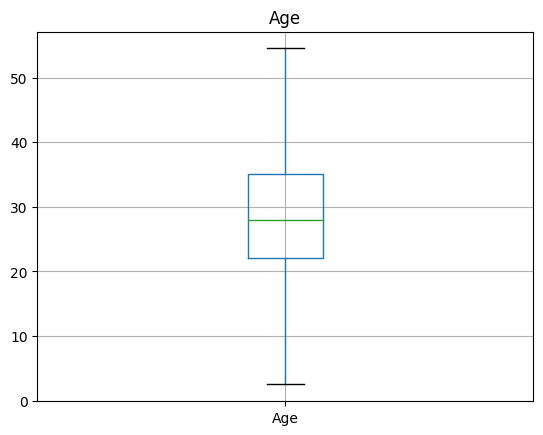

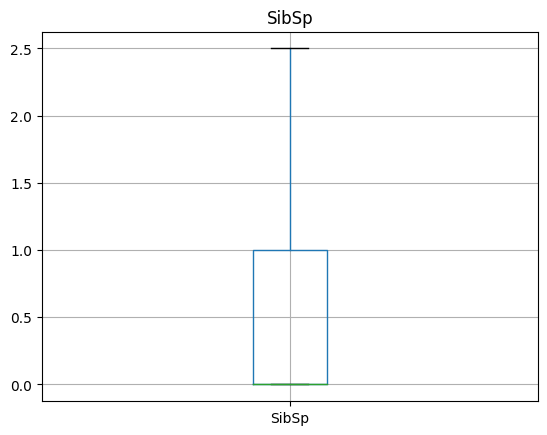

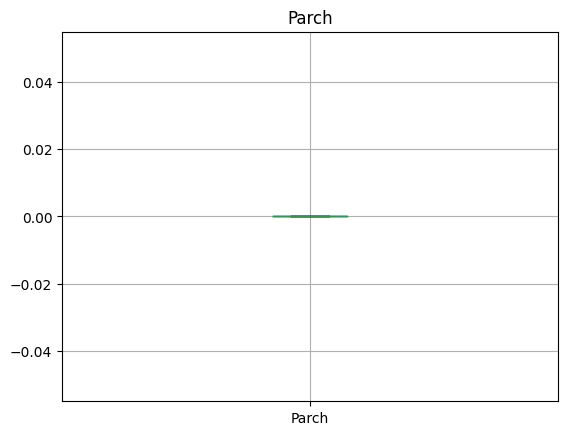

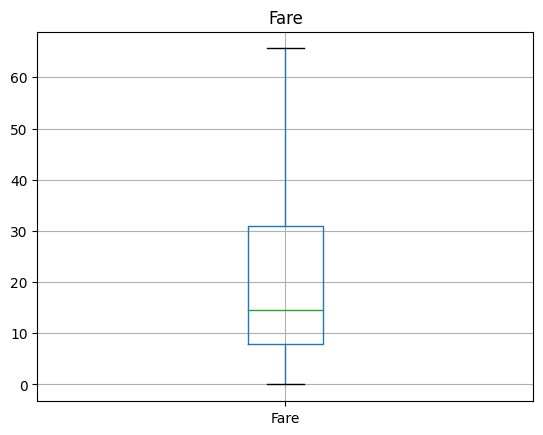

In [11]:
for col in df.columns:
  if df[col].dtype !='object':
    plt.figure()
    df.boxplot([col])
    plt.title(col)

In [12]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,male,22.0,1.0,0.0,7.2500,S
1,1.0,1.0,female,38.0,1.0,0.0,65.6344,C
2,1.0,3.0,female,26.0,0.0,0.0,7.9250,S
3,1.0,1.0,female,35.0,1.0,0.0,53.1000,S
4,0.0,3.0,male,35.0,0.0,0.0,8.0500,S


In [13]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.0,3.0,22.0,1.0,0.0,7.2500,True,False,True
1,1.0,1.0,38.0,1.0,0.0,65.6344,False,False,False
2,1.0,3.0,26.0,0.0,0.0,7.9250,False,False,True
3,1.0,1.0,35.0,1.0,0.0,53.1000,False,False,True
4,0.0,3.0,35.0,0.0,0.0,8.0500,True,False,True


In [14]:
df.isna().sum()

,0
Survived,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0
Sex_male,0
Embarked_Q,0
Embarked_S,0


In [15]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

In [16]:
df['Age']=scaler.fit_transform(df[['Age']])
df['Fare']=scaler.fit_transform(df[['Fare']])

In [17]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,8.910000e+02,891.000000,891.0,8.910000e+02
mean,0.383838,2.308642,2.392400e-17,0.426487,0.0,9.968332e-17
std,0.486592,0.836071,1.000562e+00,0.708246,0.0,1.000562e+00
min,0.000000,1.000000,-2.199638e+00,0.000000,0.0,-1.174727e+00
25%,0.000000,2.000000,-5.834321e-01,0.000000,0.0,-7.882908e-01
50%,0.000000,3.000000,-8.613809e-02,0.000000,0.0,-4.686152e-01
75%,1.000000,3.000000,4.940382e-01,1.000000,0.0,3.396748e-01
max,1.000000,3.000000,2.110244e+00,2.500000,0.0,2.031623e+00


In [18]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [20]:
df.isna().sum()

,0
Survived,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0
Sex_male,0
Embarked_Q,0
Embarked_S,0


# **KNn**

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)

for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred=classifier.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  metric_k.append(acc)

In [22]:
metric_k

[0.7988826815642458,
 0.770949720670391,
 0.8156424581005587,
 0.8100558659217877,
 0.8268156424581006,
 0.8044692737430168,
 0.8100558659217877,
 0.7877094972067039,
 0.8044692737430168,
 0.7988826815642458,
 0.7821229050279329,
 0.7821229050279329]

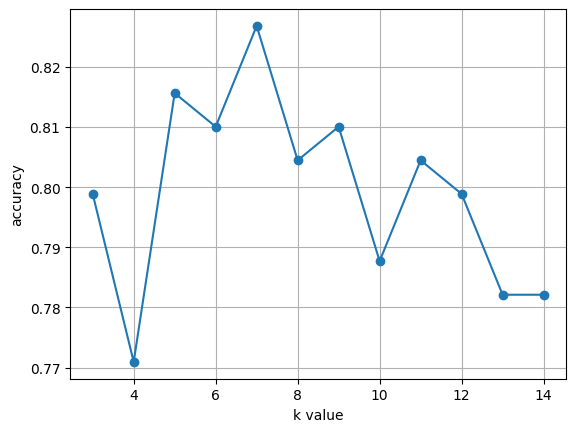

In [23]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [24]:
classifier=KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)
model1=classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
acc=accuracy_score(y_test,y_pred)

In [25]:
print('Accuracy is:', accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred))
print('recall score is:',recall_score(y_test,y_pred))
print('f1_score:',f1_score(y_test,y_pred))

Accuracy is: 0.8268156424581006
Precision is: 0.8307692307692308
recall score is: 0.7297297297297297
f1_score: 0.7769784172661871


# **hypertunning the KNn using Gride search**

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

knn_clf = KNeighborsClassifier()
knn_grid = GridSearchCV(estimator=knn_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
knn_grid.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [27]:
knn_clf=KNeighborsClassifier(metric='manhattan',n_neighbors=3,weights='distance')
model1=knn_clf.fit(x_train,y_train)

In [28]:
knn_grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}

In [29]:
knn_grid.best_score_

0.7935093075938146

In [30]:
knn_clf = KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance')
model2 = knn_clf.fit(x_train, y_train)


In [31]:
y_pred=knn_clf.predict(x_test)
print('Accuracy is :',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred))
print('recall score is:',recall_score(y_test,y_pred))
print('f1_score:',f1_score(y_test,y_pred))

Accuracy is : 0.7877094972067039
Precision is: 0.7647058823529411
recall score is: 0.7027027027027027
f1_score: 0.7323943661971832


# **here after hyper tunning the accuracy score decreases so KNn is not best model**

## **SVM**

In [32]:
from sklearn.svm import SVC
sv_clf=SVC()
model2=sv_clf.fit(x_train,y_train)

In [33]:
y_pred=sv_clf.predict(x_test)
print('Accuracy is :',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred))
print('recall score is:',recall_score(y_test,y_pred))
print('f1_score:',f1_score(y_test,y_pred))

Accuracy is : 0.8044692737430168
Precision is: 0.782608695652174
recall score is: 0.7297297297297297
f1_score: 0.7552447552447553


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf'],
              'gamma': ['scale', 'auto']}

svc_clf = SVC()
svc_grid = GridSearchCV(estimator=svc_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
svc_grid.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [35]:
svc_grid.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [36]:
svc_grid.best_score_

0.825824879346006

In [37]:
sv_clf=SVC(C=10,gamma='scale',kernel='rbf')
model2=sv_clf.fit(x_train,y_train)

In [38]:
y_pred=sv_clf.predict(x_test)
print('Accuracy is :',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred))
print('recall score is:',recall_score(y_test,y_pred))
print('f1_score:',f1_score(y_test,y_pred))

Accuracy is : 0.8156424581005587
Precision is: 0.8360655737704918
recall score is: 0.6891891891891891
f1_score: 0.7555555555555555


# **here after hyper tunning thr accuracy score increased so SVM is the best model**

# K Fold Validation  for model1=KNN

In [39]:
from sklearn.model_selection import KFold
kfold_val=KFold(10)

In [40]:
for train_index,test_index in kfold_val.split(x,y):
  print('Training index:',train_index)
  print('Testing index:',test_index)

Training index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [41]:
from sklearn.model_selection import cross_val_score
kv_result=cross_val_score(model1,x,y,cv=kfold_val)

In [42]:
kv_result

array([0.73333333, 0.80898876, 0.74157303, 0.7752809 , 0.7752809 ,
       0.82022472, 0.78651685, 0.75280899, 0.80898876, 0.79775281])

In [43]:
np.mean(kv_result)

0.7800749063670411

# K Fold Validation  for model2=SVM

In [44]:
from sklearn.model_selection import cross_val_score
kv_result=cross_val_score(model2,x,y,cv=kfold_val)

In [45]:
kv_result

array([0.83333333, 0.84269663, 0.78651685, 0.85393258, 0.84269663,
       0.80898876, 0.79775281, 0.75280899, 0.8988764 , 0.85393258])

In [46]:
np.mean(kv_result)

0.8271535580524343

# **Stratified Cross  Validation for model1=KNn**

In [47]:
from sklearn.model_selection import StratifiedKFold
skv_fold=StratifiedKFold(10)
skv_result=cross_val_score(model1,x,y,cv=skv_fold)
skv_result

array([0.72222222, 0.78651685, 0.74157303, 0.78651685, 0.80898876,
       0.79775281, 0.82022472, 0.74157303, 0.80898876, 0.79775281])

In [48]:
np.mean(skv_result)

0.7812109862671661

# **Stratified Cross Validation for model2=SVM**

In [49]:
skv_result=cross_val_score(model2,x,y,cv=skv_fold)
skv_result

array([0.84444444, 0.83146067, 0.75280899, 0.88764045, 0.86516854,
       0.79775281, 0.82022472, 0.76404494, 0.87640449, 0.83146067])

In [50]:
np.mean(skv_result)

0.8271410736579277

# **since SVM's mean accuracy is higher ,after validation and hypertunning ,coclude that SVM is the better model**